# Pulsar detection

# TA COMMENTS (DELETE CELL PRIOR TO SUBMISSION)
- [x] Work is not reproducible. Remember to set seed at the beginning of the report
- [x] Good wrangling of data, each step of the code is clear.


- [ ] Need to state the predictors clearly in the introduction, and need to come up with a clear predictive question
- [ ] No interpretation is given for the summary table or summary plot. Remember, whenever we create a visualization, we always want to explain why we decided to make that graph/table and what information we can pull out of it
- [ ] Need more reasoning for why choosing those four variables as your predictors


- [ ] Writing is clear and straightforward, with a concise explanation of each step.
- [ ] Minor grammar mistakes. "activites" instead of "activities"

## Introduction
- [ ] provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

- [ ] clearly state the question you tried to answer with your project

- [ ] identify and describe the dataset that was used to answer the question

**DELETE THE CRIT ABOVE ONLY BEFORE SUBMISSION**

### Background information

A pulsar is a celestial body which emits precise amounts of electromagnetic radiation. It is highly sought after by astrophysicists as it is the only place where they can observe matter indirectly at nuclear density. The 8 columns of data are divided to two categories: Integrated profile and DM_SNR curve. Integrated profile is the integration and colmination of individual observation and DM_SNR  is Signal-to-noise ratio. 

Chosen predictors: Mean, SD, ExcessKurtosis and Skrewness of Integrated profile (Column 1, 2, 3, 4 respectively)

### Question?
> The question must look like the ones from worksheet pass it a hypothetical observation and see if it is pulsar or not. TO BE ADDED AFTER THE MODEL HAS BEEN MADE

Can we build an accurate classifier to distinguish pulsars from other celestial bodies solely based on data gathered from integrated profiles?

## Methods & Results (code should be here)
- [ ] describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

> your report should include code which:

- [x] loads data from the original source on the web 
    
- [x] wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    
- [ ] performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    
- [ ] creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    
- [ ] performs the data analysis
    
- [ ] creates a visualization of the analysis 
    
- [ ] note: all tables and figure should have a figure/table number and a legend

**DELETE THE CRIT ABOVE ONLY BEFORE SUBMISSION**


In [1]:
# loading dependencies
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### 1. Showing that the data can be read and tidying the data

In [16]:
# setting seed
set.seed(8888)

# loading the data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
destFile <- "pulsarData.zip"
download.file(url, destFile)
pulsarData <- read_csv(unzip("pulsarData.zip", "HTRU_2.csv"), col_names = FALSE)


# adding the column names
colnames(pulsarData) <- c("MeanIntegratedprofile", # X1
                           "SdIntegratedProfile",   # X2
                           "ExcessKurtosisIntegratedProfile", # X3
                           "SkewnessIntegratedProfile", #X4
                           "MeanDM_SNRcurve", # X5
                           "SdDM_SNRcurve",  #X6
                           "ExcessKurtosisDM_SNRcurve", #X7
                           "SkewnessDM_SNRcurve", #X8
                           "Class") #X9
# factoring the class 
pulsarData = mutate(pulsarData, Class = as.factor(Class))

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### 2. Dividing the data into training data and validating data

In [17]:
pulsarSplit <- initial_split(pulsarData, prop = 0.75, strata = Class)
pulsarTrain <- training(pulsarSplit)
pulsarTesting <- testing(pulsarSplit)

#### 3. Summarize the data in at least one table

Chosen features: Mean, SD, ExcessKurtosis and Skrewness of Integrated profile (Column 1, 2, 3, 4 respectively)

In [18]:
# Summarize the data in at least one table
pulsarTrain %>% group_by(Class) %>% summarize(Count = n(), 
                                              IQRMeanIntegratedprofile = IQR(MeanIntegratedprofile), 
                                              MedianSdIntegratedprofile = mad(SdIntegratedProfile), 
                                              MeanExcessKurtosisIntegratedProfile = mean(ExcessKurtosisIntegratedProfile),
                                              SkewnessIntegratedProfile = mean(SkewnessIntegratedProfile))

Class,Count,IQRMeanIntegratedprofile,MedianSdIntegratedprofile,MeanExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,12193,23.00781,5.870108,0.2137852,0.3875657
1,1230,47.07617,8.402391,3.1239039,15.4233106


#### 4. visualize the data

By Observing all relationships between each varialibles, we focus on Mean, SD, ExcessKurtosis and Skrewness of Integrated profile.

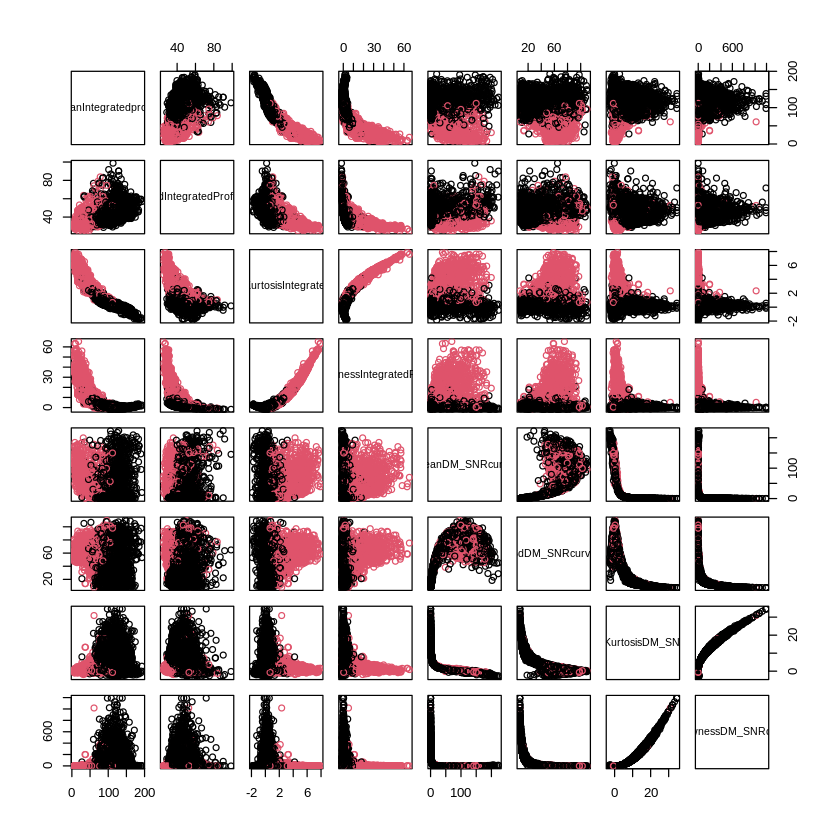

In [19]:
plot(pulsarTrain[1:8], col= pulsarTrain$Class)

In [38]:
dim(pulsarTrain)

[1] 13423     9

# NEW CODE (TO BE ORGANIZED)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.9676680,10,0.001880492,Preprocessor1_Model01
2,roc_auc,binary,0.9263208,10,0.006219289,Preprocessor1_Model01
3,accuracy,binary,0.9766830,10,0.001836461,Preprocessor1_Model02
3,roc_auc,binary,0.9355862,10,0.005654289,Preprocessor1_Model02
5,accuracy,binary,0.9780978,10,0.001299752,Preprocessor1_Model03
5,roc_auc,binary,0.9409117,10,0.005062035,Preprocessor1_Model03
6,accuracy,binary,0.9780978,10,0.001299752,Preprocessor1_Model04
6,roc_auc,binary,0.9425246,10,0.005173407,Preprocessor1_Model04
7,accuracy,binary,0.9780978,10,0.001327844,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.9676680,10,0.001880492,Preprocessor1_Model01
3,accuracy,binary,0.9766830,10,0.001836461,Preprocessor1_Model02
5,accuracy,binary,0.9780978,10,0.001299752,Preprocessor1_Model03
6,accuracy,binary,0.9780978,10,0.001299752,Preprocessor1_Model04
7,accuracy,binary,0.9780978,10,0.001327844,Preprocessor1_Model05
8,accuracy,binary,0.9780978,10,0.001327844,Preprocessor1_Model06
10,accuracy,binary,0.9780235,10,0.001497960,Preprocessor1_Model07
11,accuracy,binary,0.9783960,10,0.001513282,Preprocessor1_Model08
13,accuracy,binary,0.9780979,10,0.001289949,Preprocessor1_Model09


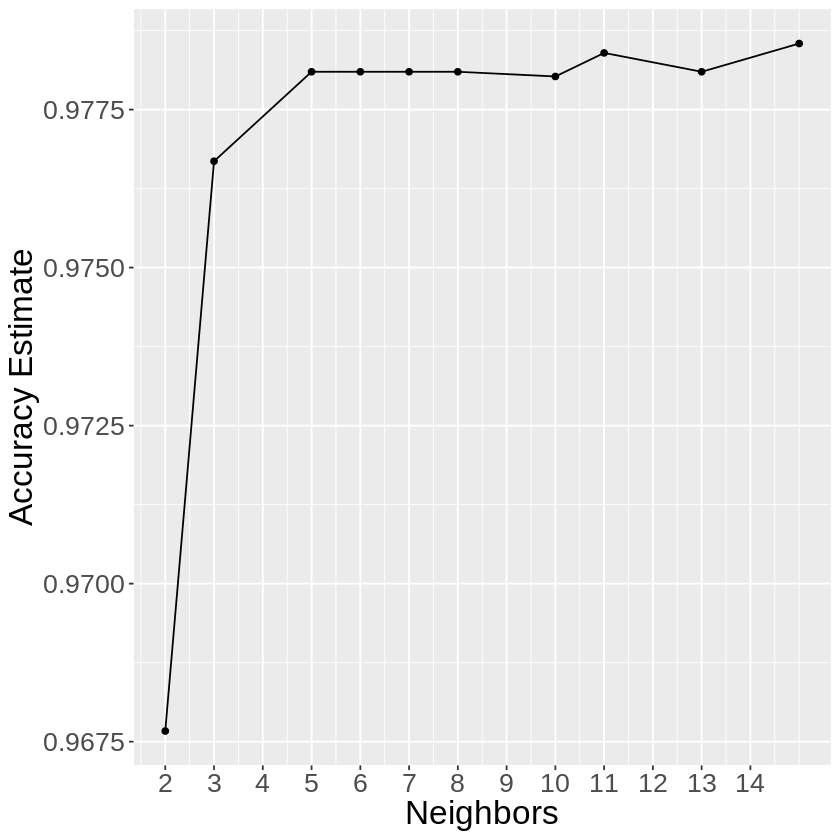

In [55]:
# Chosen predictors: Mean, SD, ExcessKurtosis and Skrewness of Integrated profile (Column 1, 2, 3, 4 respectively)

# making the recipe
pulsar_recipe <- recipe(Class ~ MeanIntegratedprofile + SdIntegratedProfile + ExcessKurtosisIntegratedProfile + SkewnessIntegratedProfile, data = pulsarTrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())


knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

pulsar_vfold <- vfold_cv(pulsarTrain, v = 10, strata = Class)


# finding the optimal k
knn_results <- workflow() |>
      add_recipe(pulsar_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = pulsar_vfold, grid = 10) |>
      collect_metrics()

knn_results

# determining the accuracy associated with each k
accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

# drawing a plot of the Ks and their accuracy
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() + 
    scale_x_continuous(breaks = seq(0, 14, by = 1)) +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

cross_val_plot

# determining the k that had the highest accuracy 
k <- (accuracies |> arrange(desc(mean)) |> slice(1))$neighbors 

# the knn model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k) |>
  set_engine("kknn") |>
  set_mode("classification")

# fiting the model 
knn_fit <- workflow() |>
  add_recipe(pulsar_recipe) |>
  add_model(knn_spec) |>
  fit(data = pulsarTrain)

## Discussion
- [ ] summarize what you found

- [ ] discuss whether this is what you expected to find?

- [ ] discuss what impact could such findings have?

- [ ] discuss what future questions could this lead to?

**DELETE THE CRIT ABOVE ONLY BEFORE SUBMISSION**


## References
- [ ] At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
 
- [ ] Make sure to cite the source of your data as well.

- [ ] converted the sources to APA citation and added all of the source and the criteria above are satisfied 

**DELETE THE CRIT ABOVE ONLY BEFORE SUBMISSION**

source of data: https://archive.ics.uci.edu/ml/datasets/HTRU2  
additional resources: https://as595.github.io/classification/

